# Analyze traffic accident data to identify patterns re;ated to road conditions, weather and time of day. Visualize accident hotspots and contributing factors.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('US_Accidents_March23.csv')

In [4]:
# Visualize all columns
pd.set_option('display.max_columns', None)
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
df.shape

(7728394, 46)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [7]:
# Dropping ID feature 
df = df.drop(['ID'], axis = 1)

In [8]:
# Percentage of missing values in each column
df.isnull().sum() / len(df) * 100

Source                    0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                  44.029355
End_Lng                  44.029355
Distance(mi)              0.000000
Description               0.000065
Street                    0.140637
City                      0.003274
County                    0.000000
State                     0.000000
Zipcode                   0.024779
Country                   0.000000
Timezone                  0.101030
Airport_Code              0.292881
Weather_Timestamp         1.555666
Temperature(F)            2.120143
Wind_Chill(F)            25.865904
Humidity(%)               2.253301
Pressure(in)              1.820288
Visibility(mi)            2.291524
Wind_Direction            2.267043
Wind_Speed(mph)           7.391355
Precipitation(in)        28.512858
Weather_Condition         2.244438
Amenity             

In [9]:
# Dropping rows that contain blank values for the following columns
df = df.dropna(subset=['End_Lat','End_Lng', 'Wind_Chill(F)', 'Precipitation(in)'])

In [10]:
df.shape

(3608534, 45)

In [11]:
# Removing unnecessary columns
df = df.drop(['Source', 'End_Lat', 'End_Lng', 'Description', 'Distance(mi)','Street','County', 'Zipcode','Country',
             'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Sunrise_Sunset', 'State', 'Wind_Direction'], axis = 1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3608534 entries, 3402762 to 7728393
Data columns (total 30 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Start_Time             object 
 2   End_Time               object 
 3   Start_Lat              float64
 4   Start_Lng              float64
 5   City                   object 
 6   Temperature(F)         float64
 7   Wind_Chill(F)          float64
 8   Humidity(%)            float64
 9   Pressure(in)           float64
 10  Visibility(mi)         float64
 11  Wind_Speed(mph)        float64
 12  Precipitation(in)      float64
 13  Weather_Condition      object 
 14  Amenity                bool   
 15  Bump                   bool   
 16  Crossing               bool   
 17  Give_Way               bool   
 18  Junction               bool   
 19  No_Exit                bool   
 20  Railway                bool   
 21  Roundabout             bool   
 22  Station     

In [14]:
# Percentage of missing values in each column
df.isnull().sum() / len(df) * 100

Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
City                     0.004323
Temperature(F)           0.000000
Wind_Chill(F)            0.000000
Humidity(%)              0.156712
Pressure(in)             0.073382
Visibility(mi)           0.347343
Wind_Speed(mph)          0.000000
Precipitation(in)        0.000000
Weather_Condition        0.263348
Amenity                  0.000000
Bump                     0.000000
Crossing                 0.000000
Give_Way                 0.000000
Junction                 0.000000
No_Exit                  0.000000
Railway                  0.000000
Roundabout               0.000000
Station                  0.000000
Stop                     0.000000
Traffic_Calming          0.000000
Traffic_Signal           0.000000
Turning_Loop             0.000000
Civil_Twilight           0.510013
Nautical_Twilight        0.510013
Astronomical_T

In [15]:
# Replacing null values with median for numerical data

df['Humidity(%)'].fillna(df['Humidity(%)'].median(), inplace=True)
df['Pressure(in)'].fillna(df['Pressure(in)'].median(), inplace=True)
df['Visibility(mi)'].fillna(df['Visibility(mi)'].median(), inplace=True)

In [17]:
# Replacing null values with mode for categorical data
df['Weather_Condition'].fillna(df['Weather_Condition'].mode(), inplace=True)
df['Civil_Twilight'].fillna(df['Civil_Twilight'].mode(), inplace=True)
df['Nautical_Twilight'].fillna(df['Nautical_Twilight'].mode(), inplace=True)
df['Astronomical_Twilight'].fillna(df['Astronomical_Twilight'].mode(), inplace=True)

In [18]:
df.describe()

,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,3.608534e+06,3.608534e+06,3.608534e+06,3.608534e+06,3.608534e+06,3.608534e+06,3.608534e+06,3.608534e+06,3.608534e+06,3.608534e+06
mean,2.076181e+00,3.612628e+01,-9.516546e+01,6.103491e+01,5.969724e+01,6.380036e+01,2.935123e+01,9.053053e+00,7.440861e+00,5.729945e-03
std,3.859030e-01,5.351130e+00,1.799463e+01,1.942430e+01,2.171846e+01,2.291750e+01,1.140876e+00,2.576280e+00,5.593851e+00,6.089731e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.318205e+01,-1.175450e+02,4.800000e+01,4.600000e+01,4.700000e+01,2.919000e+01,1.000000e+01,3.000000e+00,0.000000e+00
50%,2.000000e+00,3.606075e+01,-8.728060e+01,6.300000e+01,6.300000e+01,6.600000e+01,2.972000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.014199e+01,-8.020956e+01,7.600000e+01,7.600000e+01,8.300000e+01,2.997000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.748413e+01,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.000000e+02,1.087000e+03,2.400000e+01


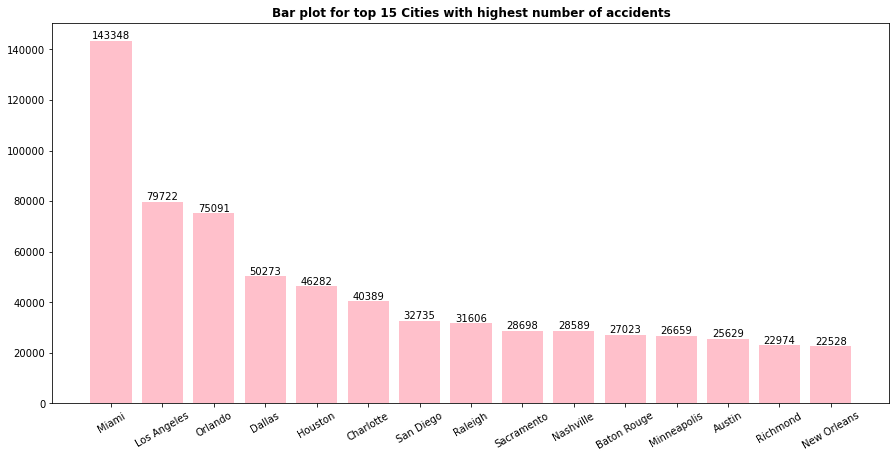

In [48]:
plt.figure(figsize=(15,7))
counts = df['City'].value_counts()[:15]
plt.bar(counts.index, counts, color='pink')
plt.title('Bar plot for top 15 Cities with highest number of accidents', fontweight='bold')
for  i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.xticks(rotation=30)
plt.show()

In [61]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

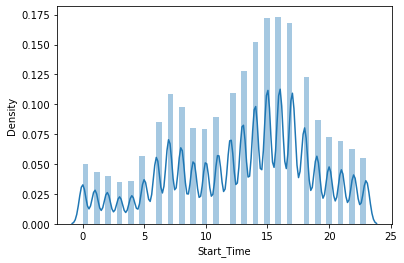

In [118]:
sns.distplot(df['Start_Time'].dt.hour, norm_hist=True)
plt.show()

Most of the accidents have occured between 3PM and 7PM

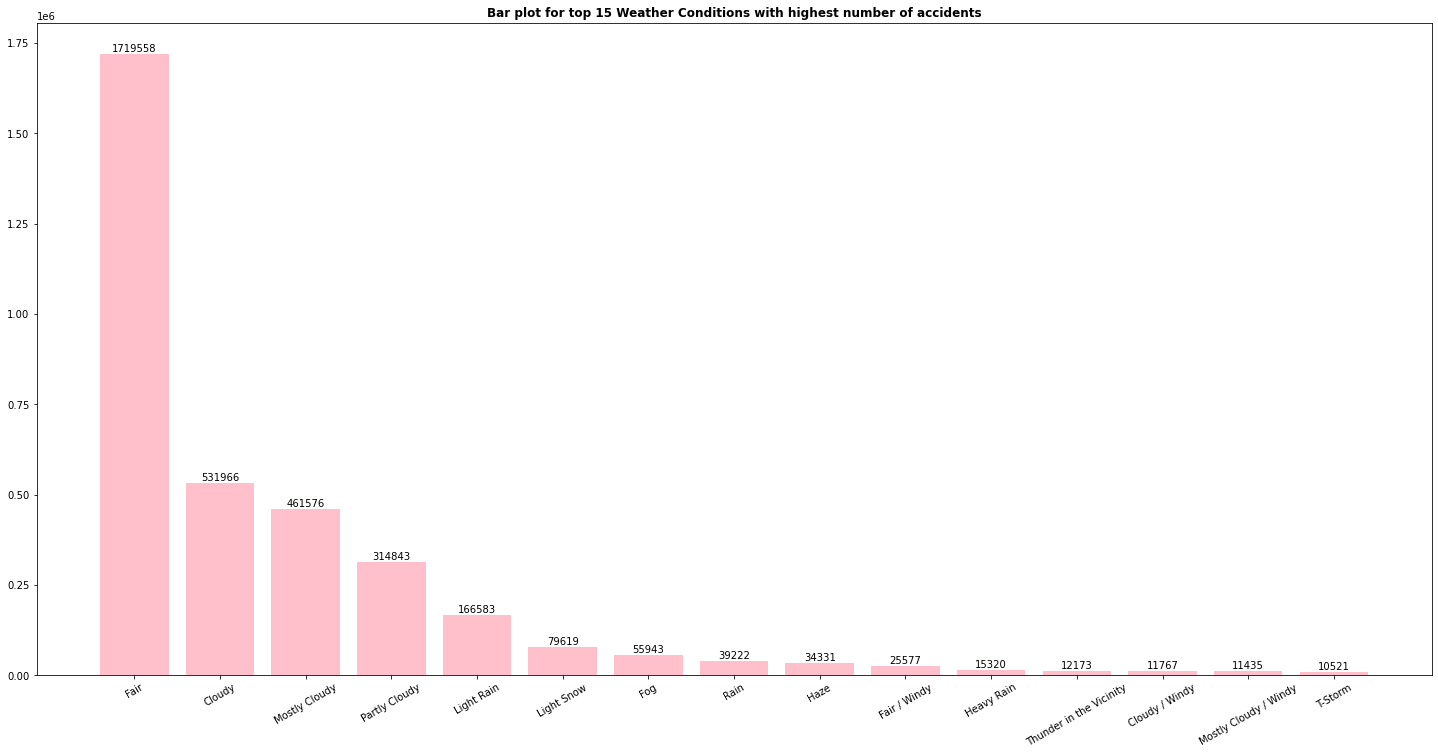

In [92]:
plt.figure(figsize=(25,12))
counts = df['Weather_Condition'].value_counts()[:15]
plt.bar(counts.index, counts, color='pink')
plt.title('Bar plot for top 15 Weather Conditions with highest number of accidents', fontweight='bold')
for  i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.xticks(rotation=30)
plt.show()

Most of the accidents occured during a fair weather condition.

In [83]:
df['Bump'].value_counts()

False    3606510
True        2024
Name: Bump, dtype: int64

In [93]:
df['Roundabout'].value_counts()

False    3608425
True         109
Name: Roundabout, dtype: int64

In [94]:
df['Crossing'].value_counts()

False    3269234
True      339300
Name: Crossing, dtype: int64

In [95]:
df['Give_Way'].value_counts()

False    3596670
True       11864
Name: Give_Way, dtype: int64

In [96]:
df['Junction'].value_counts()

False    3326552
True      281982
Name: Junction, dtype: int64

In [97]:
df['Traffic_Signal'].value_counts()

False    3280970
True      327564
Name: Traffic_Signal, dtype: int64

In [104]:
df['Turning_Loop'].value_counts()

False    3608534
Name: Turning_Loop, dtype: int64

Road conditions like Turning, Bump, Traffic signal, Junction, Give_way, Roundabout, Crossing were not the reasons for accidents. At all these locations the number of accidents were less compared to accidents occured at locations which have those conditions.

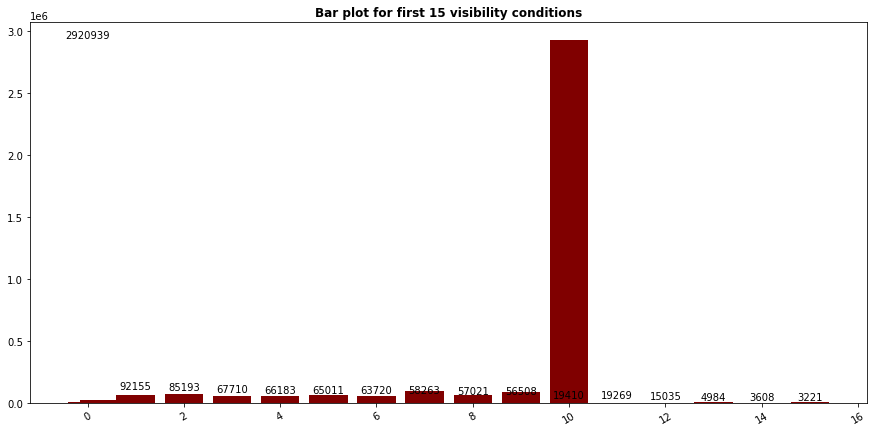

In [117]:
plt.figure(figsize=(15,7))
counts = df['Visibility(mi)'].value_counts()[:15]
plt.bar(counts.index, counts, color='Maroon')
plt.title('Bar plot for first 15 Visibility conditions', fontweight='bold')
for  i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.xticks(rotation=30)
plt.show()

Most of the accidents occured when Visibility was 10 miles.